In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore')

from collections import Counter


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# read the data
# print out 
songs = pd.read_csv("../data/raw/train.csv")
songs.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.00,0.06,0.00,...,0.26,0.00,0.04,0.00,0.00,0.00,0.38,0.12,sadness,1.00
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.04,0.10,0.44,...,0.00,0.00,0.12,0.00,0.21,0.05,0.00,0.00,world/life,1.00
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.00,0.00,0.00,...,0.25,0.00,0.32,0.00,0.00,0.00,0.00,0.23,music,1.00
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.05,0.00,0.00,...,0.00,0.00,0.00,0.13,0.00,0.00,0.23,0.00,romantic,1.00
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.00,0.00,0.42,...,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.00,romantic,1.00


In [4]:
# print out the information from the dataframe
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [5]:
# missing value
songs.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [6]:
# describe
songs.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00,28362.00
mean,42948.17,1990.24,73.03,0.02,0.12,0.12,0.06,0.02,0.02,0.05,0.08,0.10,0.06,0.05,0.05,0.02,0.13,0.03,0.43
std,24747.81,18.49,41.83,0.05,0.18,0.17,0.11,0.04,0.04,0.11,0.11,0.18,0.12,0.09,0.09,0.05,0.18,0.07,0.26
min,0.00,1950.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,20393.50,1975.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19
50%,45407.00,1991.00,63.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.41
75%,64089.50,2007.00,93.00,0.00,0.19,0.20,0.07,0.01,0.00,0.04,0.13,0.09,0.06,0.05,0.06,0.03,0.24,0.03,0.64
max,82451.00,2019.00,199.00,0.65,0.98,0.96,0.97,0.50,0.55,0.94,0.65,0.99,0.96,0.64,0.67,0.62,0.98,0.96,1.00


In [7]:
songs.shape


(28362, 24)

In [8]:

# drop the column
songs_drop = songs.copy()
songs_drop.drop(columns=[ "lyrics", "len"], inplace=True)
songs_drop.head()


,Unnamed: 0,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.00,0.06,0.00,0.00,0.00,...,0.26,0.00,0.04,0.00,0.00,0.00,0.38,0.12,sadness,1.00
1,4,frankie laine,i believe,1950,pop,0.04,0.10,0.44,0.00,0.00,...,0.00,0.00,0.12,0.00,0.21,0.05,0.00,0.00,world/life,1.00
2,6,johnnie ray,cry,1950,pop,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,0.32,0.00,0.00,0.00,0.00,0.23,music,1.00
3,10,pérez prado,patricia,1950,pop,0.05,0.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.13,0.00,0.00,0.23,0.00,romantic,1.00
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.00,0.00,0.42,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.00,romantic,1.00


In [9]:
# create a new variable for drop column
songs_cleaned = songs_drop.copy()
songs_cleaned.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.00,0.06,0.00,0.00,0.00,...,0.26,0.00,0.04,0.00,0.00,0.00,0.38,0.12,sadness,1.00
1,4,frankie laine,i believe,1950,pop,0.04,0.10,0.44,0.00,0.00,...,0.00,0.00,0.12,0.00,0.21,0.05,0.00,0.00,world/life,1.00
2,6,johnnie ray,cry,1950,pop,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,0.32,0.00,0.00,0.00,0.00,0.23,music,1.00
3,10,pérez prado,patricia,1950,pop,0.05,0.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.13,0.00,0.00,0.23,0.00,romantic,1.00
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.00,0.00,0.42,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.00,romantic,1.00


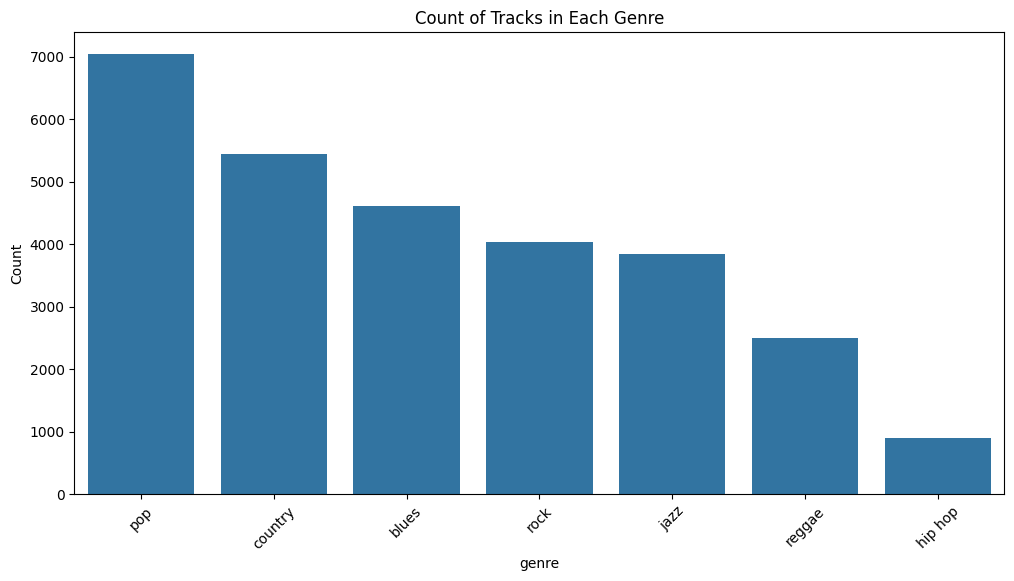

In [11]:
# 1. Bar Plot: Count of tracks in each  Genre
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=songs_cleaned, order=songs_cleaned['genre'].value_counts().index)
plt.title('Count of Tracks in Each Genre')
plt.xlabel('genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


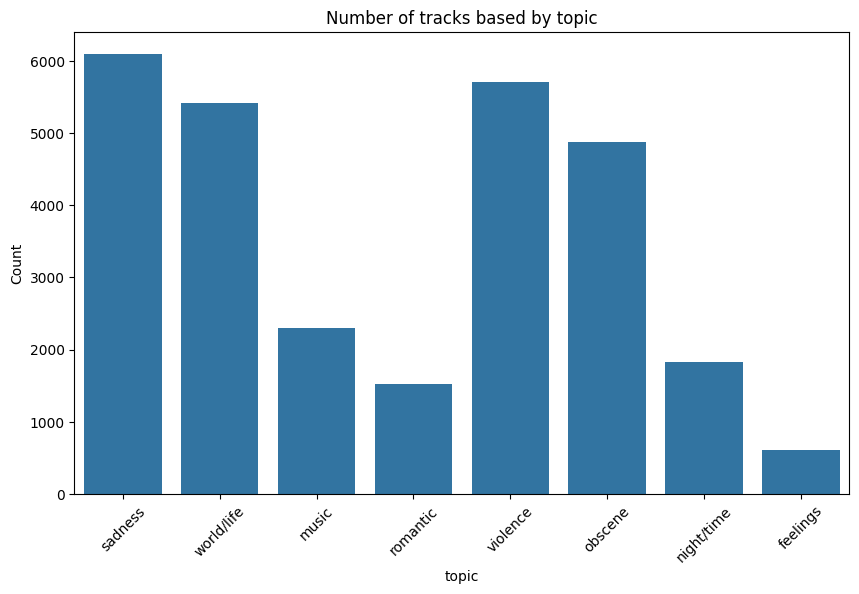

In [12]:
# 2. Count Plot: Number of tracks based by topic
plt.figure(figsize=(10, 6))
sns.countplot(x='topic', data=songs_cleaned)
plt.title('Number of tracks based by topic')
plt.xlabel('topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


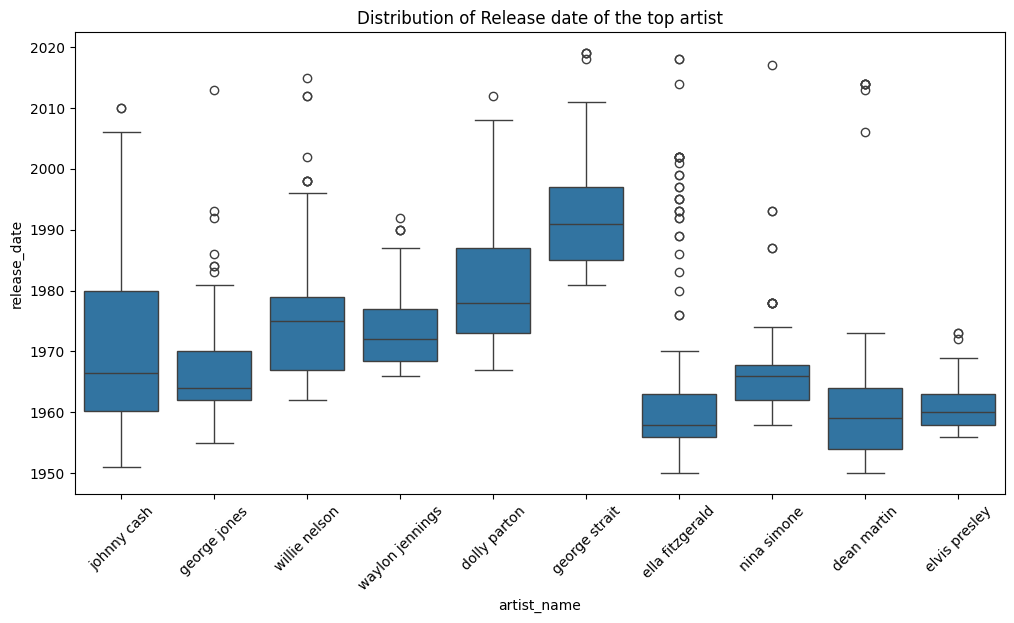

In [13]:
# 3. Box Plot: Distribution of Release date of the top artist)
top_artist_name = songs_cleaned['artist_name'].value_counts().nlargest(10).index
filtered_songs = songs_cleaned[songs_cleaned['artist_name'].isin(top_artist_name)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_name', y='release_date', data=filtered_songs)
plt.title('Distribution of Release date of the top artist')
plt.xlabel('artist_name')
plt.ylabel('release_date')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Extracting all genres and their frequencies
# all_genre = songs_cleaned['genre'].str.split(',', expand=True).stack()
# genre_counts = all_genre.value_counts()

genre_counts = songs_cleaned['genre'].value_counts()
genre_counts

genre
pop        7038
country    5444
blues      4603
rock       4032
jazz       3844
reggae     2497
hip hop     904
Name: count, dtype: int64

In [41]:
def categorize_genre(genre):
    # Define genre groups
    groups = {
        "pop": ['pop'],
        "country": ['country'],
        "blues": ['blues'],
        "rock": ["rock"],
        "jazz": ["jazz"],  
        "hip hop": ["hip hop"]}  
    for group, genres_list in groups.items():
        if any(genre for genre in genres_list):
            return group
    return "Other"

# Apply the function to the dataset
songs_cleaned['popular genre'] = songs_cleaned['genre'].apply(lambda x: categorize_genre(x.split(',')))

# Displaying the new categorization
songs_cleaned[['artist_name', "track_name", 'popular genre']].head()


,artist_name,track_name,popular genre
0,mukesh,mohabbat bhi jhoothi,pop
1,frankie laine,i believe,pop
2,johnnie ray,cry,pop
3,pérez prado,patricia,pop
4,giorgos papadopoulos,apopse eida oneiro,pop


In [17]:
songs_cleaned.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,popular genre
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.00,0.06,0.00,0.00,0.00,...,0.00,0.04,0.00,0.00,0.00,0.38,0.12,sadness,1.00,pop
1,4,frankie laine,i believe,1950,pop,0.04,0.10,0.44,0.00,0.00,...,0.00,0.12,0.00,0.21,0.05,0.00,0.00,world/life,1.00,pop
2,6,johnnie ray,cry,1950,pop,0.00,0.00,0.00,0.00,0.00,...,0.00,0.32,0.00,0.00,0.00,0.00,0.23,music,1.00,pop
3,10,pérez prado,patricia,1950,pop,0.05,0.00,0.00,0.00,0.02,...,0.00,0.00,0.13,0.00,0.00,0.23,0.00,romantic,1.00,pop
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.00,0.00,0.42,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.07,0.00,romantic,1.00,pop


In [18]:
# Extracting all actors and their frequencies
all_artist_name = songs_cleaned['artist_name'].str.split(',', expand=True).stack()
artist_name_counts = all_artist_name.value_counts()

artist_name_counts

johnny cash          190
ella fitzgerald      188
dean martin          146
willie nelson        131
george jones         107
                    ... 
la keisha              1
billy boy arnold       1
peggy scott-adams      1
the flying eyes        1
$uicideboy$            1
Name: count, Length: 5436, dtype: int64

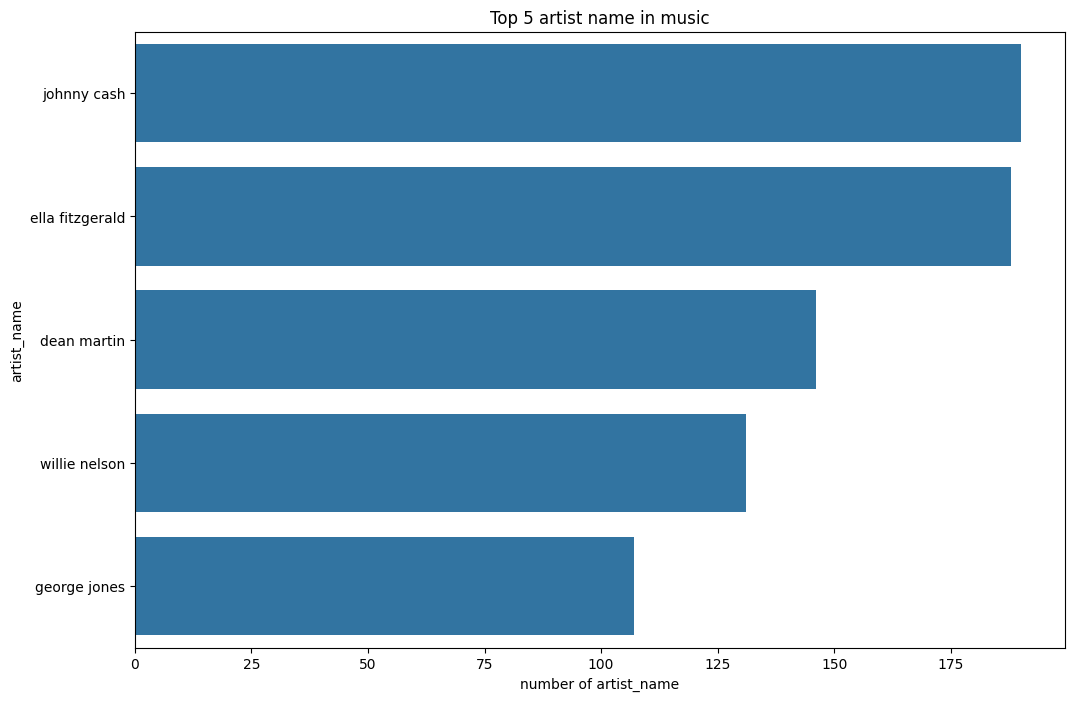

In [19]:
# Displaying the top 5 actors
top_artist_name = artist_name_counts.head(5)

# Visualizing the top actors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artist_name.values, y=top_artist_name.index)
plt.title('Top 5 artist in music')
plt.xlabel('number of artist_name')
plt.ylabel('artist_name')
plt.show()

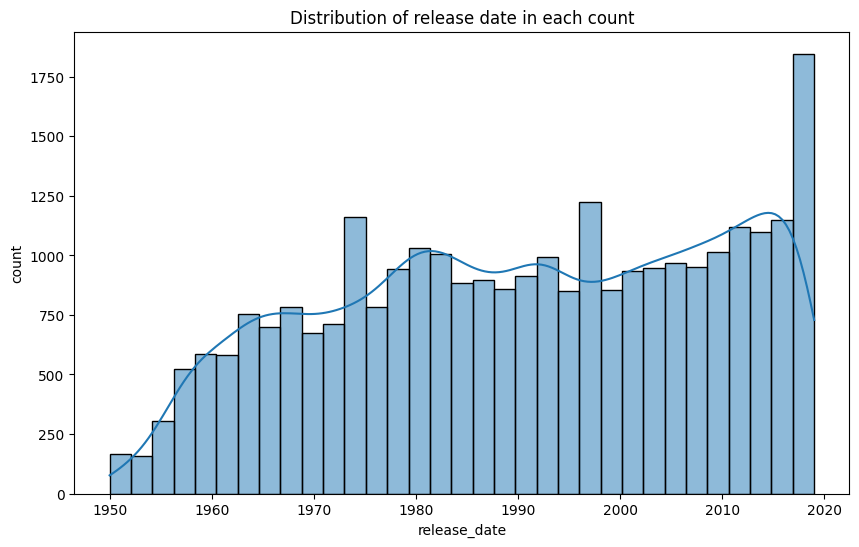

In [20]:
# Histogram: Distribution of release date in each count
plt.figure(figsize=(10, 6))
sns.histplot(songs_cleaned['release_date'], kde=True)
plt.title('Distribution of release date in each count')
plt.xlabel('release_date')
plt.ylabel('count')
plt.show()

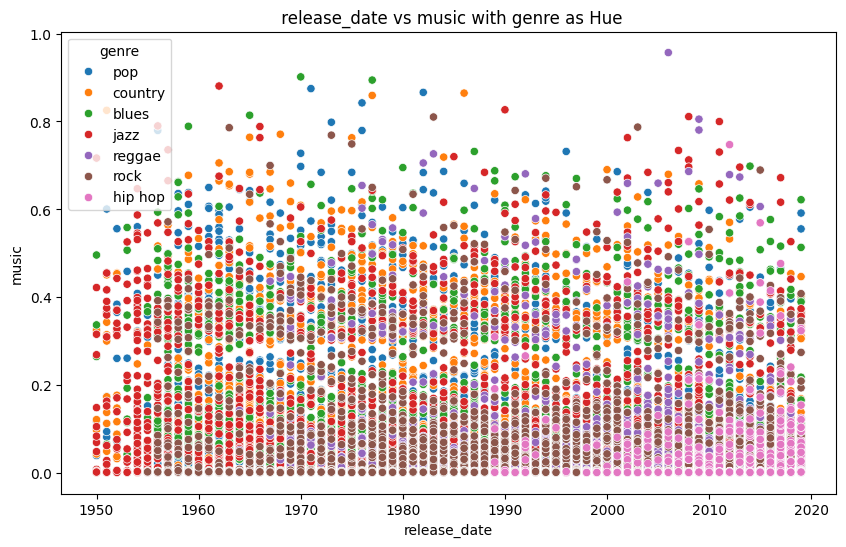

In [21]:
# Scatter Plot with Hue for genre:release_date vs music
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_date', y='music', hue='genre', data=songs_cleaned)
plt.title(' release_date vs music with genre as Hue')
plt.xlabel('release_date')
plt.ylabel('music')
plt.show()


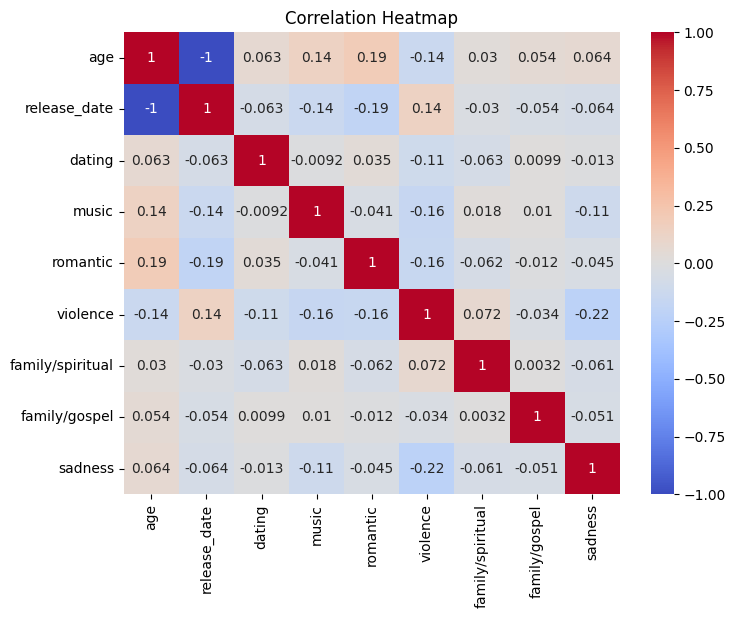

In [22]:
# Heatmap: Correlation between numerical features
correlation_matrix = songs_cleaned[[ "age",  "release_date", "dating","music", "romantic","violence", "family/spiritual", "family/gospel", "sadness"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

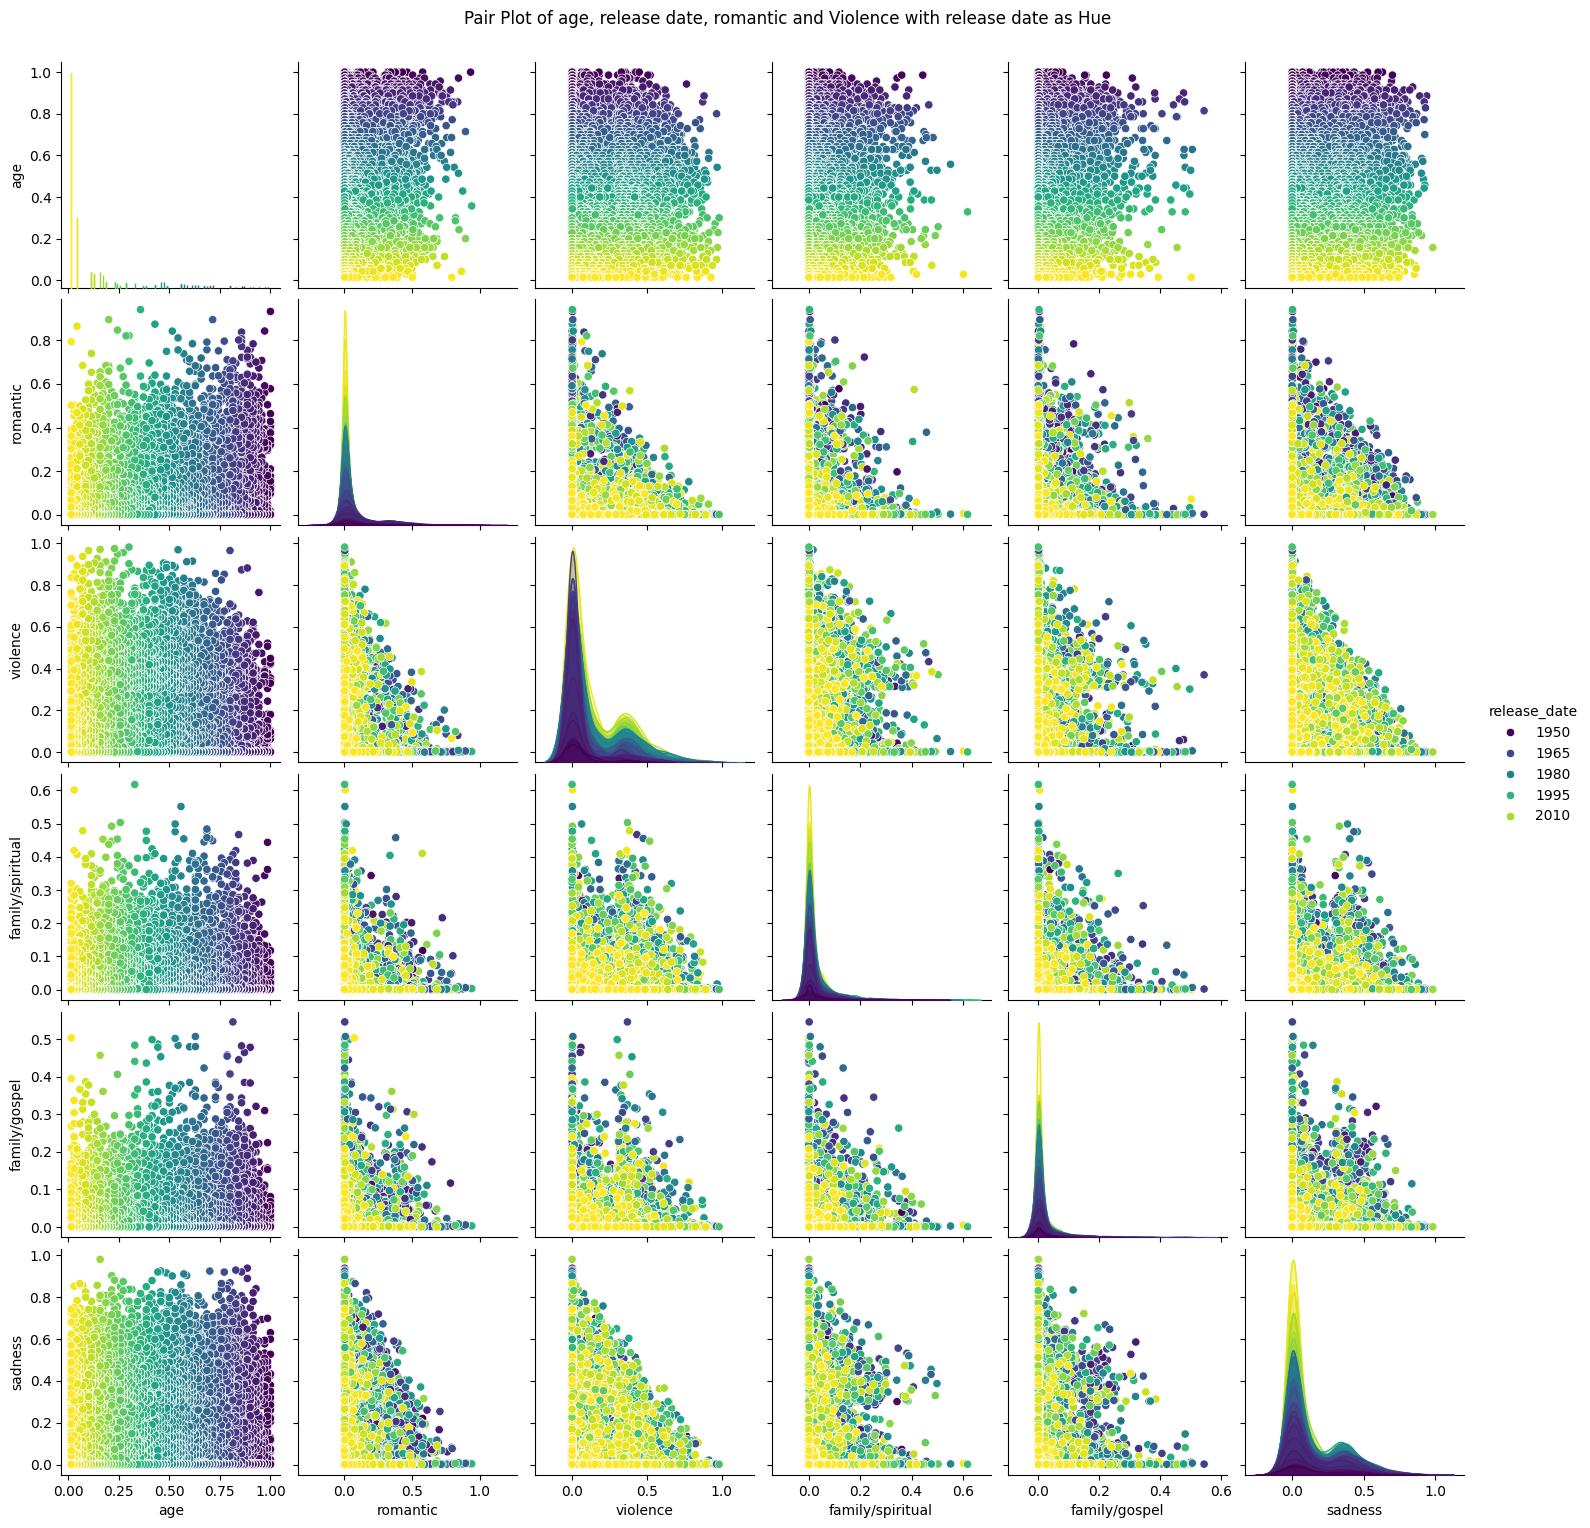

In [25]:
# Pair Plot: Pairwise relationships with release date as hue
pair_plot_data = songs_cleaned[["age",  "release_date",  "romantic","violence", "family/spiritual", "family/gospel","sadness"]]
sns.pairplot(pair_plot_data, hue='release_date', palette='viridis')
plt.suptitle('Pair Plot of age, release date, romantic and Violence with release date as Hue', y=1.02)
plt.show()


In [26]:
songs_cleaned.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,popular genre
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.00,0.06,0.00,0.00,0.00,...,0.00,0.04,0.00,0.00,0.00,0.38,0.12,sadness,1.00,pop
1,4,frankie laine,i believe,1950,pop,0.04,0.10,0.44,0.00,0.00,...,0.00,0.12,0.00,0.21,0.05,0.00,0.00,world/life,1.00,pop
2,6,johnnie ray,cry,1950,pop,0.00,0.00,0.00,0.00,0.00,...,0.00,0.32,0.00,0.00,0.00,0.00,0.23,music,1.00,pop
3,10,pérez prado,patricia,1950,pop,0.05,0.00,0.00,0.00,0.02,...,0.00,0.00,0.13,0.00,0.00,0.23,0.00,romantic,1.00,pop
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.00,0.00,0.42,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.07,0.00,romantic,1.00,pop


In [24]:
# save to new dataframe
songs_cleaned.to_csv("../data/processed/song_clean.csv", index = False)